# **Perceptron for Binary Classification (simple) on NumPy**

# Perceptron class on NumPy

In [86]:
import numpy as np

In [87]:
class Perceptron:
  def __init__(self, learning_rate=0.01, epochs=50):
    self.learning_rate = learning_rate
    self.epochs = epochs
    self.weights = np.random.normal(loc=0.0, scale=0.02, size=1+np.shape(X)[1])
    self.errors = []

  def fit(self, X, y):
    for iteration in range(self.epochs):
      error_on_epoch = 0
      for x_i, target in zip(X, y):
        step = self.learning_rate * (target - self.predict(x_i))
        self.weights[0] += step
        self.weights[1:] += step * x_i
        error_on_epoch += int(step != 0)
      self.errors.append(error_on_epoch)
    return self

  def predict(self, X):
    return np.where((np.dot(X, self.weights[1:])+self.weights[0]) >= 0, 1, -1)


# Import Data

In [88]:
import pandas as pd

In [89]:
path_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(path_url, header=None, encoding='utf-8')
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Make Pipelines

In [91]:
df1 = df[(df.iloc[:,4]=='Iris-setosa') | (df.iloc[:,4]=='Iris-versicolor')]
X = df1.iloc[:, [0,1,2,3]].values
X_test = np.concatenate((X[:10], X[-10:]))
X = X[10:-10]

In [92]:
y = df1.iloc[:, 4].values
y = np.where(y=='Iris-setosa', 1, -1)
y_test = np.concatenate((y[:10], y[-10:]))
y = y[10:-10]

In [93]:
print('X shape', np.shape(X))
print('y shape', np.shape(y))
print('X_test shape', np.shape(X_test))
print('y_test shape', np.shape(y_test))

X shape (80, 4)
y shape (80,)
X_test shape (20, 4)
y_test shape (20,)


# Train Model

In [94]:
bc = Perceptron(epochs=10)
bc.fit(X, y)
print('Model created')

In [96]:
import matplotlib.pyplot as plt

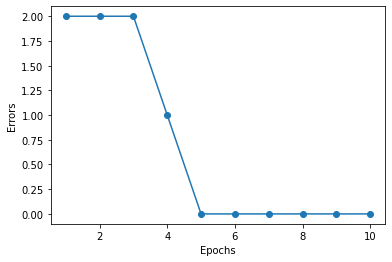

In [97]:
plt.plot(range(1, len(bc.errors) + 1), bc.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Errors')
plt.show()

# Test Model

In [99]:
print('Predictions for binary classification perceptron on test samples')
for x, y in zip(X_test, y_test):
  prediction = 'Iris-setosa' if bc.predict(x)==1 else 'Iris-versicolor'
  y_txt = 'Iris-setosa' if y==1 else 'Iris-versicolor'
  print('Features: ', x, ' actual target - ', y_txt, ' Predict - ', prediction)

Predictions for binary classification perceptron on test samples
Features:  [5.1 3.5 1.4 0.2]  actual target -  Iris-setosa  Predict -  Iris-setosa
Features:  [4.9 3.  1.4 0.2]  actual target -  Iris-setosa  Predict -  Iris-setosa
Features:  [4.7 3.2 1.3 0.2]  actual target -  Iris-setosa  Predict -  Iris-setosa
Features:  [4.6 3.1 1.5 0.2]  actual target -  Iris-setosa  Predict -  Iris-setosa
Features:  [5.  3.6 1.4 0.2]  actual target -  Iris-setosa  Predict -  Iris-setosa
Features:  [5.4 3.9 1.7 0.4]  actual target -  Iris-setosa  Predict -  Iris-setosa
Features:  [4.6 3.4 1.4 0.3]  actual target -  Iris-setosa  Predict -  Iris-setosa
Features:  [5.  3.4 1.5 0.2]  actual target -  Iris-setosa  Predict -  Iris-setosa
Features:  [4.4 2.9 1.4 0.2]  actual target -  Iris-setosa  Predict -  Iris-setosa
Features:  [4.9 3.1 1.5 0.1]  actual target -  Iris-setosa  Predict -  Iris-setosa
Features:  [5.5 2.6 4.4 1.2]  actual target -  Iris-versicolor  Predict -  Iris-versicolor
Features:  [6.

# Make Predictions

In [102]:
print('For prediction enter features')
features_names = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
F = []
for name in features_names:
  f = float(input(name))
  F.append(f)
prediction = 'Iris-setosa' if bc.predict(F)==1 else 'Iris-versicolor'
print('Features: ', F, ' Predict - ', prediction)

For prediction enter features
Sepal Length4
Sepal Width3
Petal Length1
Petal Width1
Features:  [4.0, 3.0, 1.0, 1.0]  Predict -  Iris-setosa
